# Election Poll Data Analysis
In this project, we'll look at the opinion poll data from the  2016 General Election. In the process, we'll try to answer the following questions:
     #1.Who was being polled and what was their party affiliation?
     #2.Did the poll results favour Clinton or Trump?
     #3.How did voter sentiment change over time?
    
So let's get started with the imports!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv object into a pandas dataframe
poll_df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')
print(poll_df.head())

        Pollster  Start Date    End Date  Entry Date/Time (ET)  \
0  Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
1  Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
2  Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
3  Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
4       IBD/TIPP  2016-11-04  2016-11-07  2016-11-08T12:10:06Z   

   Number of Observations                   Population        Mode  Trump  \
0                   940.0                Likely Voters    Internet   41.0   
1                     NaN     Likely Voters - Democrat    Internet    6.0   
2                     NaN   Likely Voters - Republican    Internet   82.0   
3                     NaN  Likely Voters - independent    Internet   38.0   
4                  1107.0                Likely Voters  Live Phone   43.0   

   Clinton  Other  Undecided  \
0     45.0    2.0        8.0   
1     89.0    0.0        4.0   
2      7.0    2.0        6.0   
3     43.0  

In [3]:
poll_df.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Trump', 'Clinton',
       'Other', 'Undecided', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Text', 'Question Iteration'],
      dtype='object')

In [4]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [5]:
poll_df.describe()

,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration
count,1013.000000,1522.00000,1522.000000,1098.000000,1460.000000,1522.000000
mean,1916.022705,40.64389,42.733903,5.806011,9.315068,1.216820
std,5050.240246,23.56639,25.298731,5.009533,6.253118,0.412214
min,59.000000,2.00000,1.000000,0.000000,0.000000,1.000000
25%,543.000000,32.00000,27.000000,3.000000,5.000000,1.000000
50%,894.000000,39.00000,42.000000,4.000000,8.000000,1.000000
75%,1281.000000,45.00000,50.000000,8.000000,12.000000,1.000000
max,70194.000000,93.00000,96.000000,34.000000,36.000000,2.000000


In [6]:
##Checkinh who many nan values in Number Of Observation COlumn
poll_df['Number of Observations'].isnull().sum()
##Here we can see that 509 values are nan into this column

509

# Who was being polled and what was their party affiliation?
Quickly visualising the affiliations of the different pollsters

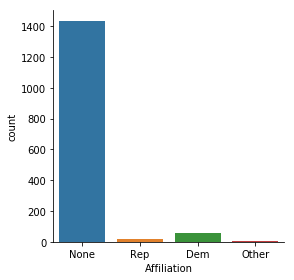

In [7]:
sns.factorplot('Affiliation',data=poll_df,kind='count')
plt.show()

Most of the polls have no affiliation; though there's stronger affiliation for Democrats than for Republicans.

In [8]:
##First we are going to see which type of  voters include in public columns
poll_df['Population'].value_counts()

Registered Voters                  290
Likely Voters                      272
Registered Voters - Democrat       177
Registered Voters - Republican     177
Registered Voters - independent    176
Likely Voters - independent        143
Likely Voters - Democrat           142
Likely Voters - Republican         142
Adults                               3
Name: Population, dtype: int64

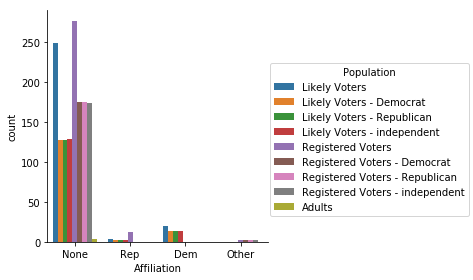

In [9]:
sns.factorplot('Affiliation',data=poll_df,kind='count',hue='Population')


As there's a strong sample of registered voters that are not affiliated, we can hope that the poll data is a good representation of the upcoming elections.

# Which Mode is use for polling

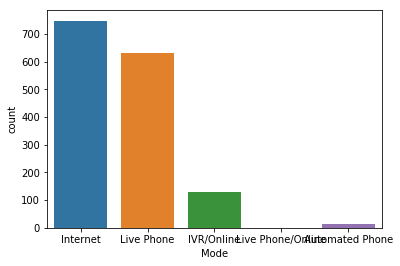

In [10]:
sns.countplot('Mode',data=poll_df)

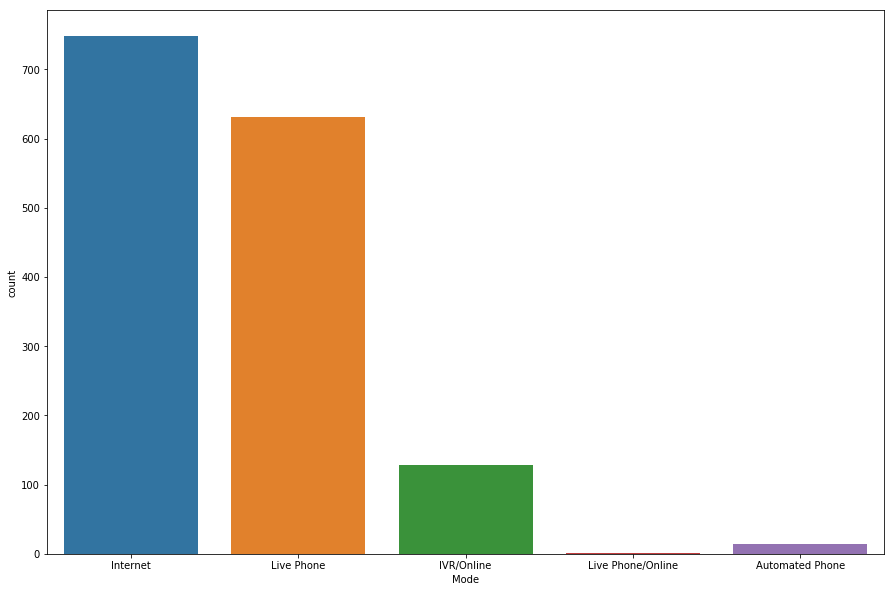

In [11]:
##in the above fig we can see that X-axis value's are collapsing so for remving them.
fig,ax1 = plt.subplots(figsize=(15,10))
sns.countplot('Mode',data=poll_df)


Here we can see that most of polling result get through Internet

# Did the poll results favour Clinton or Trump?

In [12]:
avg = pd.DataFrame(poll_df.mean())
print(avg)

                                  0
Number of Observations  1916.022705
Trump                     40.643890
Clinton                   42.733903
Other                      5.806011
Undecided                  9.315068
Question Iteration         1.216820


In [13]:
##drop Number of Observation and Question Iteration from avg
avg.drop(['Number of Observations','Question Iteration'],inplace=True)
print(avg)

                   0
Trump      40.643890
Clinton    42.733903
Other       5.806011
Undecided   9.315068


In [14]:
##calculate standard Deviation

std = poll_df.std()
print(std)

Number of Observations    5050.240246
Trump                       23.566390
Clinton                     25.298731
Other                        5.009533
Undecided                    6.253118
Question Iteration           0.412214
dtype: float64


In [15]:
#drop Number Of Observations and Question Iteration from std

std.drop(['Number of Observations','Question Iteration'],inplace=True)
print(std)

Trump        23.566390
Clinton      25.298731
Other         5.009533
Undecided     6.253118
dtype: float64


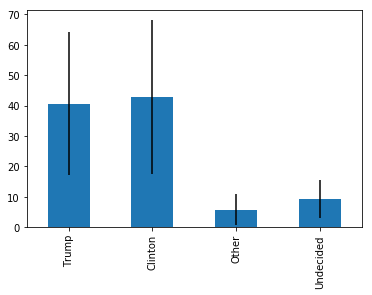

In [16]:
avg.plot(yerr=std,kind='bar',legend=False)

The race seems to be really close, with results in favour of Clinton with a higher standard deviation than for Trump.

In [17]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','Stddev']
print(poll_avg)

             Average     Stddev
Trump      40.643890  23.566390
Clinton    42.733903  25.298731
Other       5.806011   5.009533
Undecided   9.315068   6.253118


# How did voter sentiment change over time?

In [18]:
from datetime import datetime
poll_df['Difference'] = (poll_df['Clinton']-poll_df['Trump'])/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


In [19]:
#poll_df['Start Date'].unique()
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


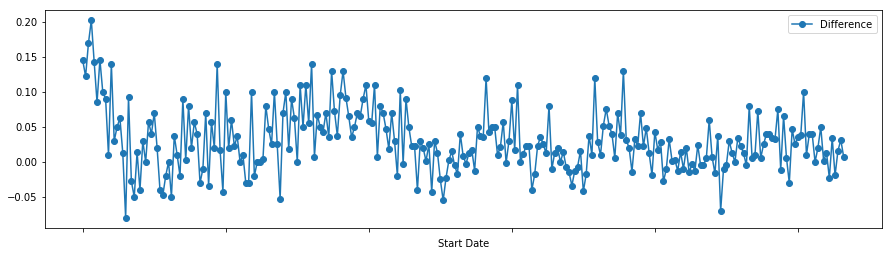

In [23]:
poll_df.plot('Start Date','Difference',figsize=(15,4),marker='o',linestyle='-')


The visualisation indicates that Trump has a slight lead in the polls, on average. Keep in mind that this is without accounting for the weights of different polls, demographics, and affiliations of the population polled.